In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [37]:
import keras
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [5]:
!ls "/content/drive/My Drive/Deep Learning/SOMEF_Extension--main"

description.csv  invocation.csv  SOMEFExtension_Description_Invocation.ipynb


In [ ]:
ext_desc=pd.read_csv("/content/drive/My Drive/Deep Learning/SOMEF_Extension--main/description.csv")


X_desc, Y_desc = ext_desc.excerpt, ext_desc.extended_description
vectorizer = CountVectorizer()
X_desc=vectorizer.fit_transform(X_desc).toarray()
Y_desc = np.where(Y_desc == True, 1, Y_desc)

X_train, X_test, Y_train, Y_test = train_test_split(X_desc, Y_desc)

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_dim=X_desc.shape[1]))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

x_val=X_train[:100]
partial_x_train=X_train[100:]
y_val=Y_train[:100]
partial_y_train=Y_train[100:]

history=model.fit(partial_x_train,partial_y_train, validation_data=(x_val,y_val),epochs=50,batch_size=512)

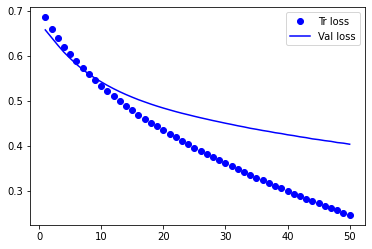

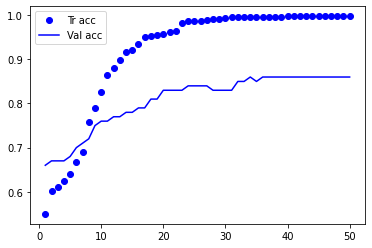

In [80]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Tr loss')
plt.plot(epochs,val_loss_values,'b',label='Val loss')
plt.legend()
plt.show()

acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(val_acc_values)+1)

plt.plot(epochs,acc_values,'bo',label='Tr acc')
plt.plot(epochs,val_acc_values,'b',label='Val acc')
plt.legend()
plt.show()

In [88]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_dim=X_desc.shape[1]))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

metric_ = [
      
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
      ]

## we choose 35 epochs because we start getting flat curves for accuracy above beyond 35 epochs
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=metric_)
history=model.fit(X_train,Y_train,epochs=35,batch_size=512)
results=model.evaluate(X_test,Y_test)
print(results)

Epoch 1/35
2/2 [==============================] - 0s 7ms/step - loss: 0.7123 - precision: 0.5652 - recall: 0.0831
Epoch 2/35
2/2 [==============================] - 0s 4ms/step - loss: 0.6809 - precision: 0.8015 - recall: 0.6709
Epoch 3/35
2/2 [==============================] - 0s 3ms/step - loss: 0.6644 - precision: 0.8309 - recall: 0.9105
Epoch 4/35
2/2 [==============================] - 0s 3ms/step - loss: 0.6495 - precision: 0.8846 - recall: 0.9553
Epoch 5/35
2/2 [==============================] - 0s 3ms/step - loss: 0.6322 - precision: 0.8886 - recall: 0.9681
Epoch 6/35
2/2 [==============================] - 0s 3ms/step - loss: 0.6149 - precision: 0.9035 - recall: 0.9872
Epoch 7/35
2/2 [==============================] - 0s 5ms/step - loss: 0.5968 - precision: 0.8943 - recall: 1.0000
Epoch 8/35
2/2 [==============================] - 0s 4ms/step - loss: 0.5807 - precision: 0.9176 - recall: 0.9968
Epoch 9/35
2/2 [==============================] - 0s 4ms/step - loss: 0.5662 - precision